## Categorical Variables

## One-Hot-Encoding (Dummy Variables)

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn

In [25]:
# The file has no headers naming the columns, so we pass header=None
# and provide the column names explicitly.
data = pd.read_csv("/home/daringunicorn/Documents/GitHub/intro-to-ml/chapter 4/adult.data", header=None, 
names=['age', 'workclass', 'fnlwgt', 'education', 'education-num',
'marital-status', 'occupation', 'relationship', 'race', 'gender',
'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
'income'])

# For illustration purposes, we only select some of the columns
data = data[["age", "workclass", "education", "gender", "hours-per-week", "occupation", "income"]]

# IPython.display allows nice output formatting within the Jupyter notebook
display(data.head())

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


### Checking string-encoded categorical data

In [26]:
print(data.gender.value_counts())

gender
Male      21790
Female    10771
Name: count, dtype: int64


In [27]:
print(data["gender"].value_counts())

gender
Male      21790
Female    10771
Name: count, dtype: int64


In [28]:
print("Original features:\n", list(data.columns), "\n")
data_dummies = pd.get_dummies(data)
print("Feature after get_dummies:\n", list(data_dummies.columns))

Original features:
 ['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income'] 

Feature after get_dummies:
 ['age', 'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th', 'education_ 11th', 'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad', 'education_ Masters', 'education_ Preschool', 'education_ Prof-school', 'education_ Some-college', 'gender_ Female', 'gender_ Male', 'occupation_ ?', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-in

In [29]:
data_dummies.head()

,age,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,income_ <=50K,income_ >50K
0,39,40,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
1,50,13,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
2,38,40,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,53,40,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,28,40,False,False,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,True,False


In [30]:
features = data_dummies.loc[:, "age":"occupation_ Transport-moving"]
# Extract NumPy arrays
X = features.values
y = data_dummies["income_ >50K"].values
print("X.shape(): {} y.shape: {}".format(X.shape, y.shape))

X.shape(): (32561, 44) y.shape: (32561,)


In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)
print("Test score: {:.2f}".format(logistic_regression.score(X_test, y_test)))

Test score: 0.81


/home/daringunicorn/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Numbers Can Encode Categoricals

In [32]:
# create a DataFrame with an integer feature and a categorical string feature
demo_df = pd.DataFrame({"Integer Feature": [0, 1, 2, 1],
                        "Categorical Feature": ["socks", "fox", "socks", "box"]})
display(demo_df)

,Integer Feature,Categorical Feature
0,0,socks
1,1,fox
2,2,socks
3,1,box


In [33]:

pd.get_dummies(demo_df)

,Integer Feature,Categorical Feature_box,Categorical Feature_fox,Categorical Feature_socks
0,0,False,False,True
1,1,False,True,False
2,2,False,False,True
3,1,True,False,False


In [34]:
demo_df["Integer Feature"] = demo_df["Integer Feature"].astype(str)
pd.get_dummies(demo_df, columns=["Integer Feature", "Categorical Feature"])

,Integer Feature_0,Integer Feature_1,Integer Feature_2,Categorical Feature_box,Categorical Feature_fox,Categorical Feature_socks
0,True,False,False,False,False,True
1,False,True,False,False,True,False
2,False,False,True,False,False,True
3,False,True,False,True,False,False


## Binning, Discretization, Linear Models and Trees

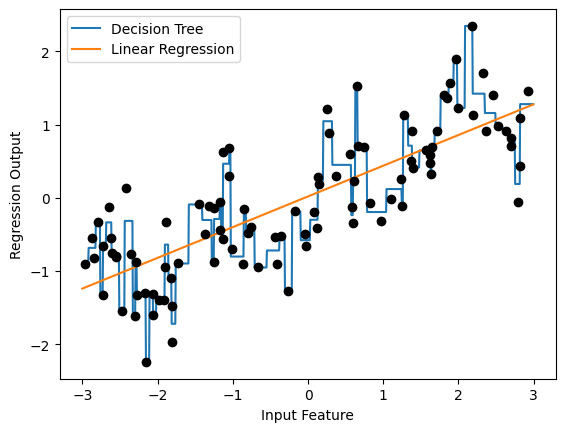

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

X, y = mglearn.datasets.make_wave(n_samples=100)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

decision_tree_regressor = DecisionTreeRegressor(min_samples_split=3).fit(X, y)
plt.plot(line, decision_tree_regressor.predict(line), label="Decision Tree")

linear_regression = LinearRegression().fit(X, y)
plt.plot(line, linear_regression.predict(line), label="Linear Regression")

plt.plot(X[:, 0], y, "o", c="k")
plt.ylabel("Regression Output")
plt.xlabel("Input Feature")
plt.legend(loc="best")

In [36]:
bins = np.linspace(-3, 3, 11)
print("bins: {}".format(bins))

bins: [-3.  -2.4 -1.8 -1.2 -0.6  0.   0.6  1.2  1.8  2.4  3. ]


In [37]:
which_bin = np.digitize(X, bins=bins)
print("\nData points: \n", X[:5])
print("\nBin membership for data points:\n", which_bin[:5])


Data points: 
 [[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]

Bin membership for data points:
 [[ 4]
 [10]
 [ 8]
 [ 6]
 [ 2]]


In [38]:
from sklearn.preprocessing import OneHotEncoder

# transform using the OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

#encoder.fit finds the unique values that appear in which_bin
encoder.fit(which_bin)

#transform creates the one-hot encoding
X_binned = encoder.transform(which_bin)
print(X_binned[:5])

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [39]:
print("X_binned.shape: {}".format(X_binned.shape))

X_binned.shape: (100, 10)


Text(0.5, 0, 'Input Feature')

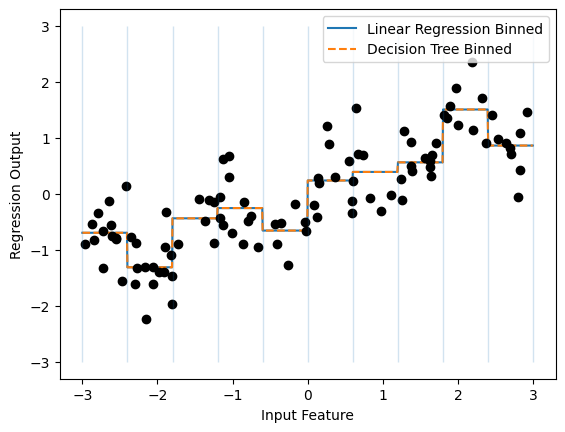

In [40]:
line_binned = encoder.transform(np.digitize(line, bins=bins))

linear_regression = LinearRegression().fit(X_binned, y)
plt.plot(line, linear_regression.predict(line_binned), label="Linear Regression Binned")

decision_tree_regressor = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)
plt.plot(line, decision_tree_regressor.predict(line_binned), label="Decision Tree Binned", linestyle="--")
plt.plot(X[:, 0], y, "o", c="k")
plt.vlines(bins, -3, 3, linewidth=1, alpha=0.2)
plt.legend(loc="best")
plt.ylabel("Regression Output")
plt.xlabel("Input Feature")

## Interactions and Polynomials

In [41]:
X_combined = np.hstack([X, X_binned])
print(X_combined.shape)

(100, 11)


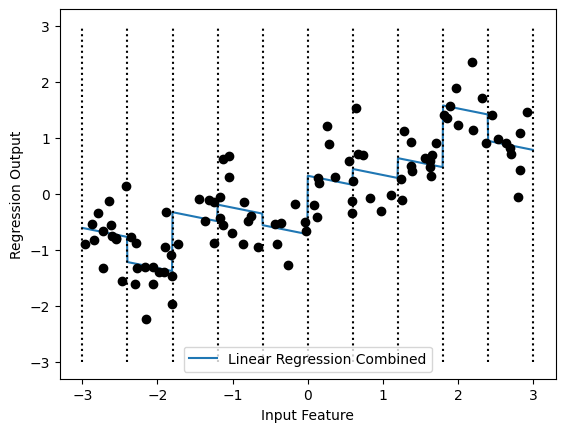

In [42]:
linear_regression = LinearRegression().fit(X_combined, y)

line_combined = np.hstack([line, line_binned])
plt.plot(line, linear_regression.predict(line_combined), label="Linear Regression Combined")

for bin in bins:
    plt.plot([bin, bin], [-3, 3], ":", c="k")

plt.legend(loc="best")
plt.ylabel("Regression Output")
plt.xlabel("Input Feature")
plt.plot(X[:, 0], y, "o", c="k")

In [43]:
X_product = np.hstack([X_binned, X * X_binned])
print(X_product.shape)


(100, 20)


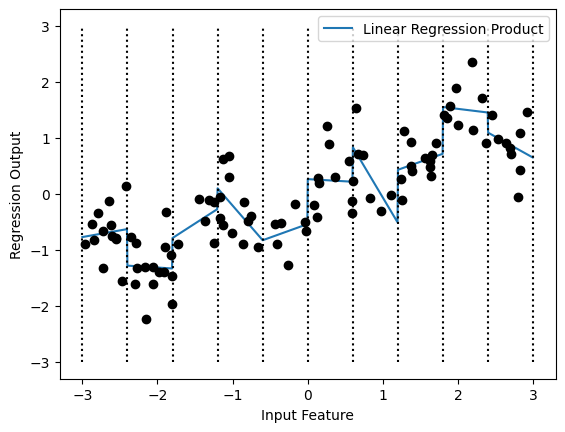

In [44]:
linear_regression = LinearRegression().fit(X_product, y)

line_product = np.hstack(([line_binned, line * line_binned]))
plt.plot(line, linear_regression.predict(line_product), label="Linear Regression Product")

for bin in bins:
     plt.plot([bin, bin], [-3, 3], ":", c="k")

plt.plot(X[:, 0], y, "o", c="k")
plt.ylabel("Regression Output")
plt.xlabel("Input Feature")
plt.legend(loc="best")

In [45]:
from sklearn.preprocessing import PolynomialFeatures

# include polynomials up to x ** 10:
# the default "include_bias=True" adds a feature that's constantly 1
polynomial_features = PolynomialFeatures(degree=10, include_bias=False)
polynomial_features.fit(X)
X_polynomial = polynomial_features.transform(X)T

SyntaxError: invalid syntax (2287770377.py, line 7)

In [ ]:
print("X_polynomial.shape: {}".format(X_polynomial.shape))

X_polynomial.shape: (100, 10)


In [ ]:
print("Entries of X:\n{}".format(X[:5]))
print("Entries of X_polynomial:\n{}".format(X_polynomial[:5]))

Entries of X:
[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]
Entries of X_polynomial:
[[-7.52759287e-01  5.66646544e-01 -4.26548448e-01  3.21088306e-01
  -2.41702204e-01  1.81943579e-01 -1.36959719e-01  1.03097700e-01
  -7.76077513e-02  5.84199555e-02]
 [ 2.70428584e+00  7.31316190e+00  1.97768801e+01  5.34823369e+01
   1.44631526e+02  3.91124988e+02  1.05771377e+03  2.86036036e+03
   7.73523202e+03  2.09182784e+04]
 [ 1.39196365e+00  1.93756281e+00  2.69701700e+00  3.75414962e+00
   5.22563982e+00  7.27390068e+00  1.01250053e+01  1.40936394e+01
   1.96178338e+01  2.73073115e+01]
 [ 5.91950905e-01  3.50405874e-01  2.07423074e-01  1.22784277e-01
   7.26822637e-02  4.30243318e-02  2.54682921e-02  1.50759786e-02
   8.92423917e-03  5.28271146e-03]
 [-2.06388816e+00  4.25963433e+00 -8.79140884e+00  1.81444846e+01
  -3.74481869e+01  7.72888694e+01 -1.59515582e+02  3.29222321e+02
  -6.79478050e+02  1.40236670e+03]]


In [ ]:
print("Polynomial feature names:\n{}".format(polynomial_features.get_feature_names_out()))

Polynomial feature names:
['x0' 'x0^2' 'x0^3' 'x0^4' 'x0^5' 'x0^6' 'x0^7' 'x0^8' 'x0^9' 'x0^10']


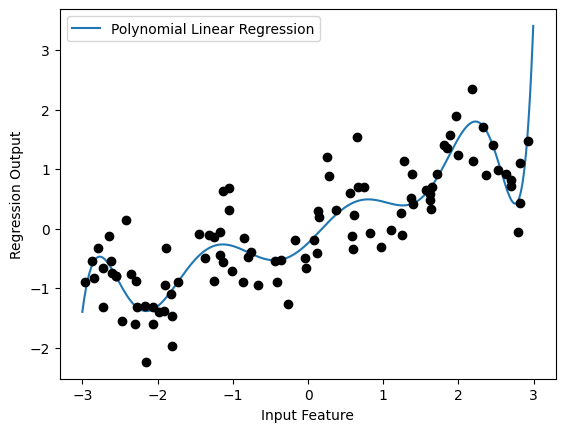

In [ ]:
linear_regression = LinearRegression().fit(X_polynomial, y)

line_polynomial = polynomial_features.transform(line)
plt.plot(line, linear_regression.predict(line_polynomial), label="Polynomial Linear Regression")
plt.plot(X[:, 0], y, "o", c="k")
plt.ylabel("Regression Output")
plt.xlabel("Input Feature")
plt.legend(loc="best")

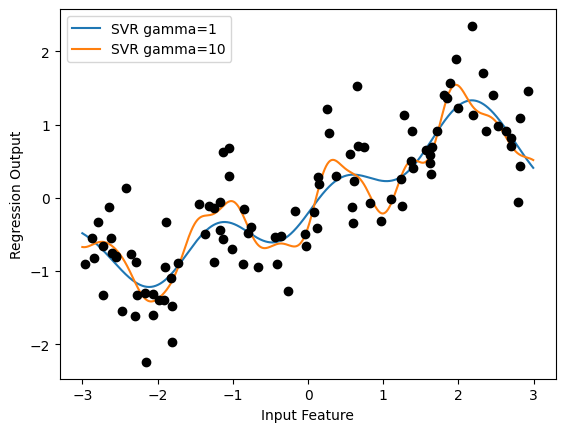

In [ ]:
from sklearn.svm import SVR

for gamma in [1, 10]:
    svr = SVR(gamma=gamma).fit(X, y)
    plt.plot(line, svr.predict(line), label="SVR gamma={}".format(gamma))

plt.plot(X[:, 0], y, "o", c="k")
plt.ylabel("Regression Output")
plt.xlabel("Input Feature")
plt.legend(loc="best")

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X, y = fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# rescale data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
polynomial_features = PolynomialFeatures(degree=2).fit(X_train_scaled)
X_train_polynomial = polynomial_features.transform(X_train_scaled)
X_test_polynomial = polynomial_features.transform(X_test_scaled)
print("X_train.shape: {}".format(X_train.shape))
print("X_train_polynomial.shape: {}".format(X_train_polynomial.shape))

X_train.shape: (15480, 8)
X_train_polynomial.shape: (15480, 45)


In [ ]:
print("Polynomial feature names:\n{}".format(polynomial_features.get_feature_names_out()))

Polynomial feature names:
['1' 'x0' 'x1' 'x2' 'x3' 'x4' 'x5' 'x6' 'x7' 'x0^2' 'x0 x1' 'x0 x2'
 'x0 x3' 'x0 x4' 'x0 x5' 'x0 x6' 'x0 x7' 'x1^2' 'x1 x2' 'x1 x3' 'x1 x4'
 'x1 x5' 'x1 x6' 'x1 x7' 'x2^2' 'x2 x3' 'x2 x4' 'x2 x5' 'x2 x6' 'x2 x7'
 'x3^2' 'x3 x4' 'x3 x5' 'x3 x6' 'x3 x7' 'x4^2' 'x4 x5' 'x4 x6' 'x4 x7'
 'x5^2' 'x5 x6' 'x5 x7' 'x6^2' 'x6 x7' 'x7^2']


In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train_scaled, y_train)
print("Score without interactions: {:.3f}".format(ridge.score(X_test_scaled, y_test)))
ridge = Ridge().fit(X_train_polynomial, y_train)
print("Score with interactions: {:.3f}".format(ridge.score(X_test_polynomial, y_test)))

Score without interactions: 0.584
Score with interactions: 0.605


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100).fit(X_train_scaled, y_train)
print("Score without interactions: {:.3f}".format(rf.score(X_test_scaled, y_test)))
rf = RandomForestRegressor(n_estimators=100).fit(X_train_polynomial, y_train)
print("Score with interactions: {:.3f}".format(rf.score(X_test_polynomial, y_test)))

Score without interactions: 0.793
Score with interactions: 0.810


In [ ]:
rnd = np.random.RandomState(0)
X_org = rnd.normal(size=(1000, 3))
w = rnd.normal(size=3)

X = rnd.poisson(10 * np.exp(X_org))
y = np.dot(X_org, w)

In [ ]:
print("Number of feature appearances:\n{}".format(np.bincount(X[:, 0])))

Number of feature appearances:
[28 38 68 48 61 59 45 56 37 40 35 34 36 26 23 26 27 21 23 23 18 21 10  9
 17  9  7 14 12  7  3  8  4  5  5  3  4  2  4  1  1  3  2  5  3  8  2  5
  2  1  2  3  3  2  2  3  3  0  1  2  1  0  0  3  1  0  0  0  1  3  0  1
  0  2  0  1  1  0  0  0  0  1  0  0  2  2  0  1  1  0  0  0  0  1  1  0
  0  0  0  0  0  0  1  0  0  0  0  0  1  1  0  0  1  0  0  0  0  0  0  0
  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]


Text(0.5, 0, 'Value')

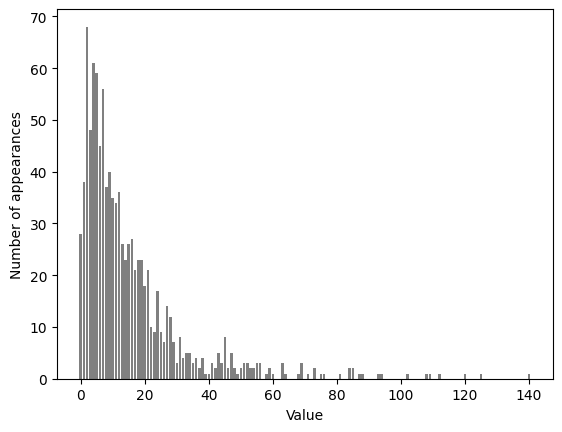

In [ ]:
bins = np.bincount(X[:, 0])
plt.bar(range(len(bins)), bins, color='gray')
plt.ylabel("Number of appearances")
plt.xlabel("Value")

In [ ]:
from sklearn.linear_model import Ridge

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
score = Ridge().fit(X_train, y_train).score(X_test, y_test)
print("Test score: {:.3f}".format(score))

Test score: 0.622


In [ ]:
X_train_log = np.log(X_train + 1)
X_test_log = np.log(X_test + 1)

Text(0.5, 0, 'Value')

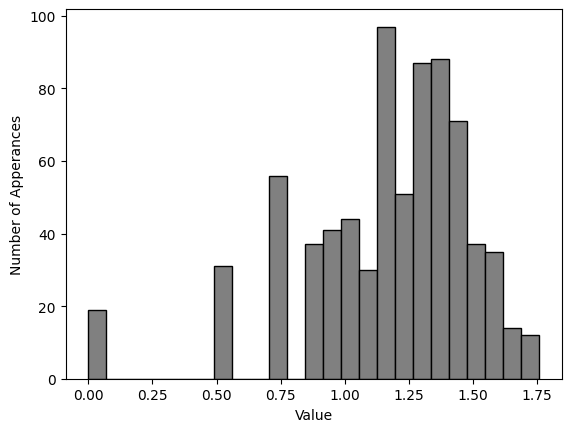

In [ ]:
plt.hist(np.log(X_train_log[:, 0] + 1), bins=25, color="gray", histtype="bar", edgecolor="black")
plt.ylabel("Number of Apperances")
plt.xlabel("Value")

In [ ]:
score = Ridge().fit(X_train_log, y_train).score(X_test_log, y_test)
print("Test score: {:.3f}".format(score))

NameError: name 'Ridge' is not defined

## Automatic Feature Selection

### Univariate Statistics

In [46]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

# get deterministic random numbers
rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data), 50))

# add noise features to the data
# the first 30 features are from the dataset, the next 50 are noise
X_w_noise = np.hstack([cancer.data, noise])

X_train, X_test, y_train, y_test = train_test_split(X_w_noise, cancer.target, random_state=0, test_size=0.5)

# use f_classif (the default) and SelectPercentile to select 50% of features
select = SelectPercentile(percentile=50)
select.fit(X_train, y_train)

# transform training set
X_train_selected = select.transform(X_train)

print("X_train.shape: {}".format(X_train.shape))
print("X_train_selected.shape: {}".format(X_train_selected.shape))


X_train.shape: (284, 80)
X_train_selected.shape: (284, 40)


[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False  True False  True
 False False  True False False False False  True False False  True False
 False  True False  True False False False False False False  True False
  True False False False False  True False  True False False False False
  True  True False  True False False False False]


Text(0.5, 0, 'Sample index')

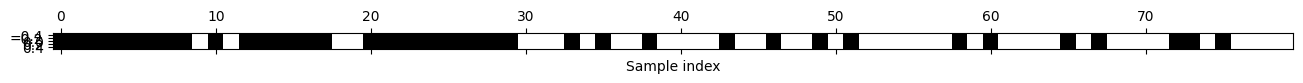

In [47]:
mask = select.get_support()
print(mask)

# visualize the mask -- black is True, white is False
plt.matshow(mask.reshape(1, -1), cmap="gray_r")
plt.xlabel("Sample index")

In [48]:
from sklearn.linear_model import LogisticRegression

# transform test data
X_test_selected = select.transform(X_test)

logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

print("Score with all features: {:.3f}".format(logistic_regression.score(X_test, y_test)))
logistic_regression.fit(X_train_selected, y_train)

print("Score with only selected features: {:.3f}".format(logistic_regression.score(X_test_selected, y_test)))

Score with all features: 0.919
Score with only selected features: 0.912


/home/daringunicorn/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/daringunicorn/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproc

### Model-Based Feature Selection

In [50]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
select = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42), threshold="median")